In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [ ]:
# Load data
(y_train, _), (y_test, _) = tf.keras.datasets.cifar10.load_data()
y_train = y_train / 255.
y_test  = y_test  / 255.

print(y_train.shape)
print(y_train.min())
print(y_train.max())
print(y_test.shape)
print(y_test.min())
print(y_test.max())

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
0.0
1.0
(10000, 32, 32, 3)
0.0
1.0


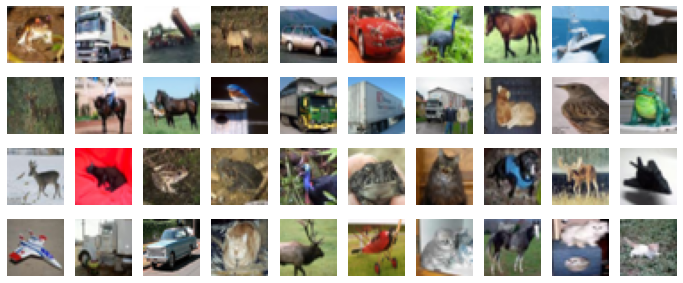

In [ ]:
# Show a few examples
plt.figure(figsize=(12, 5))
for i in range(40):
  plt.subplot(4, 10, i+1)
  plt.imshow(y_train[i])
  plt.axis('off')
plt.show()

In [ ]:
# AUX function to add noise
def add_noise(img, noise_size):
  patch_s = noise_size // 2
  cx = np.random.randint(patch_s, 32 - patch_s)
  cy = np.random.randint(patch_s, 32 - patch_s)
  img2 = img.copy()
  img2[cy - patch_s : cy + patch_s, cx - patch_s : cx + patch_s, :] = 0
  return img2

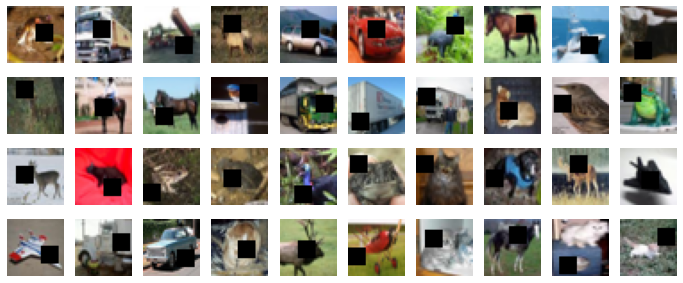

In [ ]:
# Add noise to training set and show a few examples
x_train = np.array([add_noise(y, 10) for y in y_train])

plt.figure(figsize=(12, 5))
for i in range(40):
  plt.subplot(4, 10, i+1)
  plt.imshow(x_train[i])
  plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose

In [ ]:
# Definir modelo por numero de capas y filtros
def create_model():
  AE = Sequential()
  AE.add(Input(shape=(32, 32, 3)))
  AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='relu'))
  AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='relu'))
  AE.add(Conv2DTranspose(8, 3, strides=(2, 2), padding='same', activation='relu'))
  AE.add(Conv2DTranspose(3, 3, strides=(2, 2), padding='same', activation='sigmoid'))
  return AE

#AE.add()
#AE.summary()

In [ ]:
def create_model_2(val_act, capas, filtros):
  AE = Sequential()
  AE.add(Input(shape=(32, 32, 3)))
  for i in range(capas):
    AE.add(Conv2D(filtros, 3, strides=(2, 2), padding='same', activation=val_act))
  for j in range(1,capas):
    AE.add(Conv2DTranspose(filtros, 3, strides=(2, 2), padding='same', activation=val_act))
  AE.add(Conv2DTranspose(3, 3, strides=(2, 2), padding='same', activation='sigmoid'))
  return AE

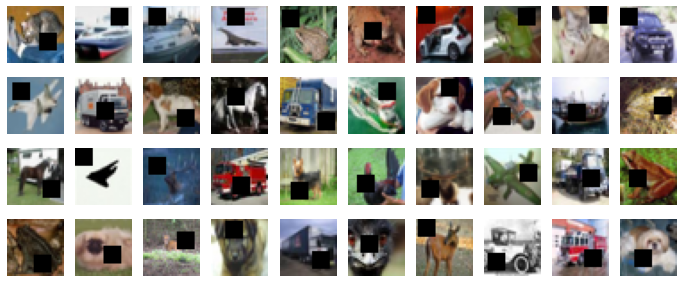

In [ ]:
# Create test set and plot a few examples
x_test = np.array([add_noise(y, 10) for y in y_test])

plt.figure(figsize=(12, 5))
for i in range(40):
  plt.subplot(4, 10, i+1)
  plt.imshow(x_test[i])
  plt.axis('off')
plt.show()

In [ ]:
# Clean it with created model
y_test_hat = modelo_1.predict(x_test)
modelo_1.evaluate(x_test, y_test)

plt.figure(figsize=(12, 5))
for i in range(40):
  plt.subplot(4, 10, i+1)
  plt.imshow(y_test_hat[i])
  plt.axis('off')
plt.show()

NameError: ignored

In [ ]:
def prom_lista(datos1): 
    for i in range(len(datos1)):  
        prom = 0
        prom += datos1[i] 
    return prom

In [ ]:
# Mini proyecto: Inpainting and Denoising Autoencoder.

# Para el modelo anterior de Denoising Autoencoder (inpainting), explora el
# desempeño que puedas obtener probando distintos valores para los siguientes
# hiperparámetros.
# 1) Número de capas convolucionales, y número de filtros en cada capa.
# 2) Función de pérdida y activaciones de las capas.
# 3) Tamaño del lote (batch size) y número de épocas.

# En una tabla reporta el desempeño obtenido con tus 7 mejores modelos.
# Justifica por qué son tus mejores modelos.
# Incluye una lista de, al menos, 3 experiencias aprendidas con este ejercicio.

# Deadline: 18 de noviembre, 6:00 pm. PDF por correo electrónico.

In [ ]:
print(h.history['precision'])
avg_precision = prom_lista(h.history['precision'])
print('Promedio de precision: ')
print(avg_precision)

[0.998580813407898, 0.9989298582077026, 0.9990817904472351, 0.9991725087165833, 0.9992390275001526, 0.999285101890564, 0.9993187785148621, 0.9993484020233154, 0.9993704557418823, 0.9993919134140015, 0.99940425157547, 0.9994168281555176, 0.9994250535964966, 0.9994366765022278, 0.9994447231292725, 0.9994496703147888, 0.999455988407135, 0.9994616508483887, 0.9994665384292603, 0.9994714856147766, 0.9994759559631348, 0.9994783997535706, 0.9994848966598511, 0.999489426612854, 0.9994942545890808, 0.9994960427284241, 0.9995000958442688, 0.9995024800300598, 0.9995067715644836, 0.999509871006012, 0.9995113015174866, 0.9995157122612, 0.9995196461677551, 0.9995204210281372, 0.9995233416557312, 0.9995260238647461, 0.99952632188797, 0.9995265603065491, 0.9995269775390625, 0.9995283484458923, 0.999530553817749, 0.9995279908180237, 0.9995318651199341, 0.9995325803756714, 0.9995312690734863, 0.999532163143158, 0.9995335340499878, 0.9995323419570923, 0.999532163143158, 0.9995325803756714]
Promedio de pr

In [ ]:
batches = [64,128,256,512]
lista = []

for b in batches:
    temp_modelo = create_model()
    temp_modelo.compile(optimizer='sgd', loss='mse', metrics=[
        keras.metrics.Precision(name="precision"), 
        keras.metrics.Recall(name="recall"),
        keras.metrics.AUC(name="auc"),])
    h = temp_modelo.fit(x=x_train, y=y_train, batch_size=b, epochs=50, validation_split=0.2)
    lista.append(['sgd','mse',b,50,prom_lista(h.history['precision']),prom_lista(h.history['recall']),prom_lista(h.history['auc'])])

dataf = pd.DataFrame(lista, columns=["Optimizador", "Perdida", "batches", 
  "Epocas", "Precision", "Recall", "auc"])
dataf        

Epoch 1/50
625/625 [==============================] - 16s 25ms/step - loss: 0.0640 - precision: 0.9988 - recall: 0.2950 - auc: 0.4754 - val_loss: 0.0633 - val_precision: 0.9991 - val_recall: 0.2085 - val_auc: 0.4923
Epoch 2/50
625/625 [==============================] - 15s 25ms/step - loss: 0.0636 - precision: 0.9993 - recall: 0.1657 - auc: 0.5111 - val_loss: 0.0630 - val_precision: 0.9994 - val_recall: 0.1320 - val_auc: 0.5031
Epoch 3/50
625/625 [==============================] - 16s 25ms/step - loss: 0.0634 - precision: 0.9995 - recall: 0.1086 - auc: 0.5141 - val_loss: 0.0629 - val_precision: 0.9995 - val_recall: 0.0907 - val_auc: 0.5118
Epoch 4/50
625/625 [==============================] - 16s 25ms/step - loss: 0.0632 - precision: 0.9996 - recall: 0.0787 - auc: 0.5043 - val_loss: 0.0628 - val_precision: 0.9996 - val_recall: 0.0659 - val_auc: 0.5003
Epoch 5/50
625/625 [==============================] - 15s 25ms/step - loss: 0.0631 - precision: 0.9996 - recall: 0.0591 - auc: 0.5059 - 

,Optimizador,Perdida,batches,Epocas,Precision,Recall,auc
0,sgd,mse,64,50,0.999886,0.390354,0.809258
1,sgd,mse,128,50,0.999668,0.146939,0.573834
2,sgd,mse,256,50,0.998368,0.014559,0.502658
3,sgd,mse,512,50,0.999448,0.029789,0.544355


In [ ]:
epochs = [5,10,25,50]
lista = []
for e in epochs:
    temp_modelo = create_model()
    temp_modelo.compile(optimizer='sgd', loss='mse', metrics=[
        keras.metrics.Precision(name="precision"), 
        keras.metrics.Recall(name="recall"),
        keras.metrics.AUC(name="auc"),])
    h = temp_modelo.fit(x=x_train, y=y_train, batch_size=64, epochs=e, validation_split=0.2)
    lista.append(['sgd','mse',64,e,prom_lista(h.history['precision']),prom_lista(h.history['recall']),prom_lista(h.history['auc'])])

dataf = pd.DataFrame(lista, columns=["Optimizador", "Perdida", "Batches", 
  "Epocas", "Precision", "Recall", "auc"])
dataf 

Epoch 1/5
625/625 [==============================] - 16s 26ms/step - loss: 0.0639 - precision: 0.9987 - recall: 0.2758 - auc: 0.4900 - val_loss: 0.0632 - val_precision: 0.9988 - val_recall: 0.1752 - val_auc: 0.5036
Epoch 2/5
625/625 [==============================] - 16s 25ms/step - loss: 0.0635 - precision: 0.9988 - recall: 0.1328 - auc: 0.5069 - val_loss: 0.0629 - val_precision: 0.9987 - val_recall: 0.0972 - val_auc: 0.5066
Epoch 3/5
625/625 [==============================] - 16s 25ms/step - loss: 0.0633 - precision: 0.9987 - recall: 0.0773 - auc: 0.5099 - val_loss: 0.0628 - val_precision: 0.9987 - val_recall: 0.0609 - val_auc: 0.5142
Epoch 4/5
625/625 [==============================] - 16s 25ms/step - loss: 0.0631 - precision: 0.9987 - recall: 0.0512 - auc: 0.5153 - val_loss: 0.0627 - val_precision: 0.9987 - val_recall: 0.0439 - val_auc: 0.5147
Epoch 5/5
625/625 [==============================] - 16s 25ms/step - loss: 0.0630 - precision: 0.9987 - recall: 0.0394 - auc: 0.5121 - val_l

,Optimizador,Perdida,Batches,Epocas,Precision,Recall,auc
0,sgd,mse,64,5,0.998655,0.039402,0.512070
1,sgd,mse,64,10,0.999262,0.020610,0.493733
2,sgd,mse,64,25,0.999478,0.111841,0.569480
3,sgd,mse,64,50,0.999878,0.385727,0.807171


In [ ]:
losses = ['mse', 'mae', 'categorical_crossentropy']
lista = []
for los in losses:
    temp_modelo = create_model()
    temp_modelo.compile(optimizer='sgd', loss=los, metrics=[
        keras.metrics.Precision(name="precision"), 
        keras.metrics.Recall(name="recall"),
        keras.metrics.AUC(name="auc"),])
    h = temp_modelo.fit(x=x_train, y=y_train, batch_size=64, epochs=50, validation_split=0.2)
    lista.append(['sgd',los,64,50,prom_lista(h.history['precision']),prom_lista(h.history['recall']),prom_lista(h.history['auc'])])

dataf = pd.DataFrame(lista, columns=["Optimizador", "Perdida", "Batches", 
  "Epocas", "Precision", "Recall", "auc"])
dataf 

Epoch 1/50
625/625 [==============================] - 16s 26ms/step - loss: 0.0641 - precision: 0.9989 - recall: 0.3586 - auc: 0.5125 - val_loss: 0.0634 - val_precision: 0.9991 - val_recall: 0.2411 - val_auc: 0.5255
Epoch 2/50
625/625 [==============================] - 16s 25ms/step - loss: 0.0636 - precision: 0.9992 - recall: 0.1820 - auc: 0.5279 - val_loss: 0.0630 - val_precision: 0.9992 - val_recall: 0.1385 - val_auc: 0.5285
Epoch 3/50
625/625 [==============================] - 15s 25ms/step - loss: 0.0633 - precision: 0.9993 - recall: 0.1129 - auc: 0.5236 - val_loss: 0.0628 - val_precision: 0.9993 - val_recall: 0.0945 - val_auc: 0.5218
Epoch 4/50
625/625 [==============================] - 15s 25ms/step - loss: 0.0631 - precision: 0.9993 - recall: 0.0830 - auc: 0.5234 - val_loss: 0.0626 - val_precision: 0.9993 - val_recall: 0.0726 - val_auc: 0.5277
Epoch 5/50
625/625 [==============================] - 15s 25ms/step - loss: 0.0629 - precision: 0.9993 - recall: 0.0672 - auc: 0.5279 - 

,Optimizador,Perdida,Batches,Epocas,Precision,Recall,auc
0,sgd,mse,64,50,0.999878,0.394657,0.803717
1,sgd,mae,64,50,0.999918,0.382688,0.846614
2,sgd,categorical_crossentropy,64,50,0.997703,0.662833,0.504583


In [ ]:
optimizadores = ['sgd','rmsprop','adam','adadelta']
lista = []
for op in optimizadores:
    temp_modelo = create_model()
    temp_modelo.compile(optimizer=op, loss='mae', metrics=[
        keras.metrics.Precision(name="precision"), 
        keras.metrics.Recall(name="recall"),
        keras.metrics.AUC(name="auc"),])
    h = temp_modelo.fit(x=x_train, y=y_train, batch_size=64, epochs=50, validation_split=0.2)
    lista.append([op,'mae',64,50,prom_lista(h.history['precision']),prom_lista(h.history['recall']),prom_lista(h.history['auc'])])

dataf = pd.DataFrame(lista, columns=["Optimizador", "Perdida", "Batches", 
  "Epocas", "Precision", "Recall", "auc"])
dataf 

Epoch 1/50
625/625 [==============================] - 16s 26ms/step - loss: 0.2106 - precision: 0.9991 - recall: 0.2973 - auc: 0.5387 - val_loss: 0.2090 - val_precision: 0.9994 - val_recall: 0.1542 - val_auc: 0.5415
Epoch 2/50
625/625 [==============================] - 16s 26ms/step - loss: 0.2091 - precision: 0.9995 - recall: 0.0965 - auc: 0.5381 - val_loss: 0.2079 - val_precision: 0.9996 - val_recall: 0.0648 - val_auc: 0.5369
Epoch 3/50
625/625 [==============================] - 16s 26ms/step - loss: 0.2082 - precision: 0.9996 - recall: 0.0517 - auc: 0.5309 - val_loss: 0.2073 - val_precision: 0.9997 - val_recall: 0.0424 - val_auc: 0.5274
Epoch 4/50
625/625 [==============================] - 16s 25ms/step - loss: 0.2077 - precision: 0.9997 - recall: 0.0395 - auc: 0.5358 - val_loss: 0.2069 - val_precision: 0.9997 - val_recall: 0.0395 - val_auc: 0.5402
Epoch 5/50
625/625 [==============================] - 16s 26ms/step - loss: 0.2074 - precision: 0.9997 - recall: 0.0427 - auc: 0.5414 - 

,Optimizador,Perdida,Batches,Epocas,Precision,Recall,auc
0,sgd,mae,64,50,0.999934,0.387271,0.849009
1,rmsprop,mae,64,50,0.999943,0.433106,0.901749
2,adam,mae,64,50,0.999923,0.424843,0.844376
3,adadelta,mae,64,50,0.998969,0.109399,0.504422


In [ ]:
# Pruebas de capas y filtros, las primeras pruebas fueron hechas de 
# 2 capas y 8 filtros
optimizadores = ['sgd','rmsprop','adam','adadelta']
lista = []
for op in optimizadores:
    temp_modelo = create_model_2('relu',3,4)
    temp_modelo.compile(optimizer=op, loss='mae', metrics=[
        keras.metrics.Precision(name="precision"), 
        keras.metrics.Recall(name="recall"),
        keras.metrics.AUC(name="auc"),])
    h = temp_modelo.fit(x=x_train, y=y_train, batch_size=64, epochs=50, validation_split=0.2)
    lista.append([op,'mae',64,50,prom_lista(h.history['precision']),prom_lista(h.history['recall']),prom_lista(h.history['auc'])])

dataf = pd.DataFrame(lista, columns=["Optimizador", "Perdida", "Batches", 
  "Epocas", "Precision", "Recall", "auc"])
dataf 

Epoch 1/50
625/625 [==============================] - 16s 26ms/step - loss: 0.2107 - precision: 0.9989 - recall: 0.0424 - auc: 0.4952 - val_loss: 0.2091 - val_precision: 0.9998 - val_recall: 0.0036 - val_auc: 0.4945
Epoch 2/50
625/625 [==============================] - 16s 25ms/step - loss: 0.2092 - precision: 0.9999 - recall: 0.0015 - auc: 0.5001 - val_loss: 0.2081 - val_precision: 0.9999 - val_recall: 4.5409e-04 - val_auc: 0.4983
Epoch 3/50
625/625 [==============================] - 16s 25ms/step - loss: 0.2085 - precision: 0.9999 - recall: 2.0514e-04 - auc: 0.4992 - val_loss: 0.2077 - val_precision: 1.0000 - val_recall: 5.3523e-05 - val_auc: 0.4981
Epoch 4/50
625/625 [==============================] - 16s 25ms/step - loss: 0.2082 - precision: 1.0000 - recall: 2.2620e-05 - auc: 0.4982 - val_loss: 0.2075 - val_precision: 1.0000 - val_recall: 1.0737e-05 - val_auc: 0.5007
Epoch 5/50
625/625 [==============================] - 16s 25ms/step - loss: 0.2080 - precision: 1.0000 - recall: 4.1

,Optimizador,Perdida,Batches,Epocas,Precision,Recall,auc
0,sgd,mae,64,50,0.000000,0.000000,0.503755
1,rmsprop,mae,64,50,0.999898,0.419132,0.837340
2,adam,mae,64,50,0.999858,0.426285,0.881567
3,adadelta,mae,64,50,0.999250,0.012316,0.525299


In [ ]:
optimizadores = ['sgd','rmsprop','adam','adadelta']
lista = []
for op in optimizadores:
    temp_modelo = create_model_2('softmax',4,6)
    temp_modelo.compile(optimizer=op, loss='mae', metrics=[
        keras.metrics.Precision(name="precision"), 
        keras.metrics.Recall(name="recall"),
        keras.metrics.AUC(name="auc"),])
    h = temp_modelo.fit(x=x_train, y=y_train, batch_size=64, epochs=50, validation_split=0.2)
    lista.append([op,'mae',64,50,prom_lista(h.history['precision']),prom_lista(h.history['recall']),prom_lista(h.history['auc'])])

dataf = pd.DataFrame(lista, columns=["Optimizador", "Perdida", "Batches", 
  "Epocas", "Precision", "Recall", "auc"])
dataf 

Epoch 1/50
625/625 [==============================] - 17s 27ms/step - loss: 0.2120 - precision: 0.9977 - recall: 0.4592 - auc: 0.5057 - val_loss: 0.2102 - val_precision: 0.9975 - val_recall: 0.3353 - val_auc: 0.5068
Epoch 2/50
625/625 [==============================] - 16s 26ms/step - loss: 0.2102 - precision: 0.9977 - recall: 0.2448 - auc: 0.5070 - val_loss: 0.2090 - val_precision: 0.9976 - val_recall: 0.1566 - val_auc: 0.5053
Epoch 3/50
625/625 [==============================] - 16s 26ms/step - loss: 0.2093 - precision: 0.9978 - recall: 0.1566 - auc: 0.5066 - val_loss: 0.2084 - val_precision: 0.9976 - val_recall: 0.1566 - val_auc: 0.5079
Epoch 4/50
625/625 [==============================] - 16s 26ms/step - loss: 0.2089 - precision: 0.9978 - recall: 0.1566 - auc: 0.5079 - val_loss: 0.2081 - val_precision: 0.9976 - val_recall: 0.1566 - val_auc: 0.5075
Epoch 5/50
625/625 [==============================] - 16s 26ms/step - loss: 0.2087 - precision: 0.9978 - recall: 0.1566 - auc: 0.5070 - 

,Optimizador,Perdida,Batches,Epocas,Precision,Recall,auc
0,sgd,mae,64,50,0.996477,0.005202,0.504659
1,rmsprop,mae,64,50,0.999730,0.421375,0.875782
2,adam,mae,64,50,0.999786,0.418787,0.890893
3,adadelta,mae,64,50,0.997685,0.312182,0.504824


In [ ]:
optimizadores = ['sgd','rmsprop','adam','adadelta']
lista = []
for op in optimizadores:
    temp_modelo = create_model_2('exponential',2,7)
    temp_modelo.compile(optimizer=op, loss='mae', metrics=[
        keras.metrics.Precision(name="precision"), 
        keras.metrics.Recall(name="recall"),
        keras.metrics.AUC(name="auc"),])
    h = temp_modelo.fit(x=x_train, y=y_train, batch_size=64, epochs=50, validation_split=0.2)
    lista.append([op,'mae',64,50,prom_lista(h.history['precision']),prom_lista(h.history['recall']),prom_lista(h.history['auc'])])

dataf = pd.DataFrame(lista, columns=["Optimizador", "Perdida", "Batches", 
  "Epocas", "Precision", "Recall", "auc"])
dataf 

Epoch 1/50
625/625 [==============================] - 16s 26ms/step - loss: 0.2273 - precision: 0.9976 - recall: 0.4338 - auc: 0.5031 - val_loss: 0.2126 - val_precision: 0.9974 - val_recall: 0.3429 - val_auc: 0.5090
Epoch 2/50
625/625 [==============================] - 16s 25ms/step - loss: 0.2102 - precision: 0.9977 - recall: 0.2412 - auc: 0.5114 - val_loss: 0.2082 - val_precision: 0.9973 - val_recall: 0.1864 - val_auc: 0.5135
Epoch 3/50
625/625 [==============================] - 16s 25ms/step - loss: 0.2083 - precision: 0.9974 - recall: 0.1502 - auc: 0.5159 - val_loss: 0.2074 - val_precision: 0.9966 - val_recall: 0.1192 - val_auc: 0.5162
Epoch 4/50
625/625 [==============================] - 16s 25ms/step - loss: 0.2077 - precision: 0.9966 - recall: 0.0908 - auc: 0.5199 - val_loss: 0.2069 - val_precision: 0.9957 - val_recall: 0.0674 - val_auc: 0.5199
Epoch 5/50
625/625 [==============================] - 16s 25ms/step - loss: 0.2073 - precision: 0.9961 - recall: 0.0629 - auc: 0.5240 - 

,Optimizador,Perdida,Batches,Epocas,Precision,Recall,auc
0,sgd,mae,64,50,0.999896,0.405934,0.869256
1,rmsprop,mae,64,50,0.999889,0.426508,0.911289
2,adam,mae,64,50,0.999803,0.436814,0.899936
3,adadelta,mae,64,50,0.997529,0.159507,0.542772


In [ ]:
#Primer modelo
optimizadores = ['sgd','rmsprop','adam','adadelta']
lista = []

temp_modelo = create_model_2('relu',2,8)
temp_modelo.compile(optimizer='sgd', loss='mse', metrics=[
        keras.metrics.Precision(name="precision"), 
        keras.metrics.Recall(name="recall"),
        keras.metrics.AUC(name="auc"),])
h = temp_modelo.fit(x=x_train, y=y_train, batch_size=64, epochs=50, validation_split=0.2)
lista.append(['sgd','mse','relu',64,50,2,8,prom_lista(h.history['precision']),prom_lista(h.history['recall']),prom_lista(h.history['auc'])])



Epoch 1/50
625/625 [==============================] - 10s 16ms/step - loss: 0.0639 - precision: 0.9984 - recall: 0.1857 - auc: 0.5024 - val_loss: 0.0632 - val_precision: 0.9983 - val_recall: 0.0724 - val_auc: 0.5049
Epoch 2/50
625/625 [==============================] - 9s 15ms/step - loss: 0.0635 - precision: 0.9985 - recall: 0.0463 - auc: 0.5071 - val_loss: 0.0629 - val_precision: 0.9984 - val_recall: 0.0305 - val_auc: 0.5117
Epoch 3/50
625/625 [==============================] - 9s 15ms/step - loss: 0.0633 - precision: 0.9986 - recall: 0.0237 - auc: 0.5148 - val_loss: 0.0628 - val_precision: 0.9985 - val_recall: 0.0177 - val_auc: 0.5130
Epoch 4/50
625/625 [==============================] - 9s 15ms/step - loss: 0.0631 - precision: 0.9987 - recall: 0.0151 - auc: 0.5127 - val_loss: 0.0626 - val_precision: 0.9985 - val_recall: 0.0128 - val_auc: 0.5132
Epoch 5/50
625/625 [==============================] - 9s 15ms/step - loss: 0.0630 - precision: 0.9987 - recall: 0.0117 - auc: 0.5173 - val_

In [ ]:
#Segundo modelo
temp_modelo = create_model_2('exponential',2,7)
temp_modelo.compile(optimizer='sgd', loss='mae', metrics=[
        keras.metrics.Precision(name="precision"), 
        keras.metrics.Recall(name="recall"),
        keras.metrics.AUC(name="auc"),])
h = temp_modelo.fit(x=x_train, y=y_train, batch_size=128, epochs=25, validation_split=0.2)
lista.append(['sgd','mae','exponential',128,25,2,7,prom_lista(h.history['precision']),prom_lista(h.history['recall']),prom_lista(h.history['auc'])])

Epoch 1/25
313/313 [==============================] - 9s 30ms/step - loss: 0.2349 - precision: 0.9977 - recall: 0.4595 - auc: 0.4969 - val_loss: 0.2190 - val_precision: 0.9974 - val_recall: 0.3905 - val_auc: 0.4945
Epoch 2/25
313/313 [==============================] - 9s 29ms/step - loss: 0.2152 - precision: 0.9977 - recall: 0.3500 - auc: 0.4964 - val_loss: 0.2115 - val_precision: 0.9975 - val_recall: 0.3224 - val_auc: 0.4959
Epoch 3/25
313/313 [==============================] - 9s 28ms/step - loss: 0.2106 - precision: 0.9977 - recall: 0.2863 - auc: 0.4985 - val_loss: 0.2089 - val_precision: 0.9974 - val_recall: 0.2380 - val_auc: 0.4983
Epoch 4/25
313/313 [==============================] - 9s 28ms/step - loss: 0.2089 - precision: 0.9975 - recall: 0.2145 - auc: 0.5019 - val_loss: 0.2078 - val_precision: 0.9973 - val_recall: 0.2030 - val_auc: 0.5029
Epoch 5/25
313/313 [==============================] - 9s 28ms/step - loss: 0.2081 - precision: 0.9976 - recall: 0.1937 - auc: 0.5068 - val_l

In [ ]:
#Tercer modelo 
temp_modelo = create_model_2('softmax',4,6)
temp_modelo.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=[
        keras.metrics.Precision(name="precision"), 
        keras.metrics.Recall(name="recall"),
        keras.metrics.AUC(name="auc"),])
h = temp_modelo.fit(x=x_train, y=y_train, batch_size=512, epochs=5, validation_split=0.2)
lista.append(['sgd','categorical_crossentropy','softmax',512,5,4,6,prom_lista(h.history['precision']),prom_lista(h.history['recall']),prom_lista(h.history['auc'])])

Epoch 1/5
79/79 [==============================] - 9s 119ms/step - loss: 1.5600 - precision: 0.9977 - recall: 0.7477 - auc: 0.5040 - val_loss: 1.5619 - val_precision: 0.9975 - val_recall: 0.7325 - val_auc: 0.5044
Epoch 2/5
79/79 [==============================] - 9s 111ms/step - loss: 1.5599 - precision: 0.9977 - recall: 0.7345 - auc: 0.5045 - val_loss: 1.5617 - val_precision: 0.9975 - val_recall: 0.7347 - val_auc: 0.5057
Epoch 3/5
79/79 [==============================] - 9s 111ms/step - loss: 1.5597 - precision: 0.9977 - recall: 0.7347 - auc: 0.5054 - val_loss: 1.5616 - val_precision: 0.9975 - val_recall: 0.7347 - val_auc: 0.5061
Epoch 4/5
79/79 [==============================] - 9s 111ms/step - loss: 1.5596 - precision: 0.9977 - recall: 0.7347 - auc: 0.5062 - val_loss: 1.5615 - val_precision: 0.9975 - val_recall: 0.7347 - val_auc: 0.5063
Epoch 5/5
79/79 [==============================] - 9s 112ms/step - loss: 1.5595 - precision: 0.9977 - recall: 0.7347 - auc: 0.5063 - val_loss: 1.561

In [ ]:
#Cuarto modelo
temp_modelo = create_model_2('softmax',4,6)
temp_modelo.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=[
        keras.metrics.Precision(name="precision"), 
        keras.metrics.Recall(name="recall"),
        keras.metrics.AUC(name="auc"),])
h = temp_modelo.fit(x=x_train, y=y_train, batch_size=64, epochs=25, validation_split=0.2)
lista.append(['rmsprop','categorical_crossentropy','softmax',64,25,2,7,prom_lista(h.history['precision']),prom_lista(h.history['recall']),prom_lista(h.history['auc'])])

Epoch 1/25
625/625 [==============================] - 11s 18ms/step - loss: 1.5586 - precision: 0.9977 - recall: 0.5585 - auc: 0.5044 - val_loss: 1.5605 - val_precision: 0.9975 - val_recall: 0.5762 - val_auc: 0.5072
Epoch 2/25
625/625 [==============================] - 10s 17ms/step - loss: 1.5584 - precision: 0.9977 - recall: 0.5753 - auc: 0.5076 - val_loss: 1.5604 - val_precision: 0.9975 - val_recall: 0.4710 - val_auc: 0.5086
Epoch 3/25
625/625 [==============================] - 10s 17ms/step - loss: 1.5583 - precision: 0.9978 - recall: 0.5431 - auc: 0.5093 - val_loss: 1.5603 - val_precision: 0.9976 - val_recall: 0.4467 - val_auc: 0.5082
Epoch 4/25
625/625 [==============================] - 10s 17ms/step - loss: 1.5583 - precision: 0.9978 - recall: 0.5075 - auc: 0.5106 - val_loss: 1.5603 - val_precision: 0.9976 - val_recall: 0.5001 - val_auc: 0.5114
Epoch 5/25
625/625 [==============================] - 10s 17ms/step - loss: 1.5583 - precision: 0.9978 - recall: 0.5182 - auc: 0.5106 - 

In [ ]:
#Quinto modelo
temp_modelo = create_model_2('relu',2,8)
temp_modelo.compile(optimizer='rmsprop', loss='mae', metrics=[
        keras.metrics.Precision(name="precision"), 
        keras.metrics.Recall(name="recall"),
        keras.metrics.AUC(name="auc"),])
h = temp_modelo.fit(x=x_train, y=y_train, batch_size=64, epochs=50, validation_split=0.2)
lista.append(['rmsprop','mae','relu',64,50,2,8,prom_lista(h.history['precision']),prom_lista(h.history['recall']),prom_lista(h.history['auc'])])

Epoch 1/50
625/625 [==============================] - 10s 16ms/step - loss: 0.1354 - precision: 0.9998 - recall: 0.4247 - auc: 0.7258 - val_loss: 0.1080 - val_precision: 0.9999 - val_recall: 0.3716 - val_auc: 0.7897
Epoch 2/50
625/625 [==============================] - 9s 15ms/step - loss: 0.1016 - precision: 0.9999 - recall: 0.4057 - auc: 0.8252 - val_loss: 0.0923 - val_precision: 0.9999 - val_recall: 0.4245 - val_auc: 0.8526
Epoch 3/50
625/625 [==============================] - 9s 15ms/step - loss: 0.0895 - precision: 1.0000 - recall: 0.4113 - auc: 0.8615 - val_loss: 0.0847 - val_precision: 1.0000 - val_recall: 0.3828 - val_auc: 0.8705
Epoch 4/50
625/625 [==============================] - 9s 15ms/step - loss: 0.0831 - precision: 1.0000 - recall: 0.4126 - auc: 0.8833 - val_loss: 0.0792 - val_precision: 1.0000 - val_recall: 0.4314 - val_auc: 0.8934
Epoch 5/50
625/625 [==============================] - 9s 15ms/step - loss: 0.0796 - precision: 1.0000 - recall: 0.4134 - auc: 0.8946 - val_

In [ ]:
#Sexto modelo
temp_modelo = create_model_2('exponential',2,7)
temp_modelo.compile(optimizer='adam', loss='mse', metrics=[
        keras.metrics.Precision(name="precision"), 
        keras.metrics.Recall(name="recall"),
        keras.metrics.AUC(name="auc"),])
h = temp_modelo.fit(x=x_train, y=y_train, batch_size=256, epochs=50, validation_split=0.2)
lista.append(['adam','mse','exponential',256,50,2,7,prom_lista(h.history['precision']),prom_lista(h.history['recall']),prom_lista(h.history['auc'])])

Epoch 1/50
157/157 [==============================] - 9s 57ms/step - loss: 0.0596 - precision: 0.9981 - recall: 0.3260 - auc: 0.5718 - val_loss: 0.0353 - val_precision: 0.9997 - val_recall: 0.3209 - val_auc: 0.7977
Epoch 2/50
157/157 [==============================] - 9s 55ms/step - loss: 0.0273 - precision: 0.9999 - recall: 0.3628 - auc: 0.8279 - val_loss: 0.0226 - val_precision: 0.9999 - val_recall: 0.3853 - val_auc: 0.7756
Epoch 3/50
157/157 [==============================] - 9s 55ms/step - loss: 0.0204 - precision: 0.9998 - recall: 0.4127 - auc: 0.7369 - val_loss: 0.0188 - val_precision: 0.9997 - val_recall: 0.4094 - val_auc: 0.7267
Epoch 4/50
157/157 [==============================] - 9s 55ms/step - loss: 0.0181 - precision: 0.9997 - recall: 0.4203 - auc: 0.7351 - val_loss: 0.0180 - val_precision: 0.9998 - val_recall: 0.3815 - val_auc: 0.7389
Epoch 5/50
157/157 [==============================] - 9s 55ms/step - loss: 0.0171 - precision: 0.9996 - recall: 0.4210 - auc: 0.7450 - val_l

In [ ]:
#Septimo modelo
temp_modelo = create_model_2('softmax',4,6)
temp_modelo.compile(optimizer='adadelta', loss='mae', metrics=[
        keras.metrics.Precision(name="precision"), 
        keras.metrics.Recall(name="recall"),
        keras.metrics.AUC(name="auc"),])
h = temp_modelo.fit(x=x_train, y=y_train, batch_size=128, epochs=25, validation_split=0.2)
lista.append(['adadelta','mae','softmax',128,25,4,6,prom_lista(h.history['precision']),prom_lista(h.history['recall']),prom_lista(h.history['auc'])])

Epoch 1/25
313/313 [==============================] - 10s 33ms/step - loss: 0.2119 - precision: 0.9977 - recall: 0.2894 - auc: 0.4946 - val_loss: 0.2112 - val_precision: 0.9974 - val_recall: 0.2891 - val_auc: 0.4939
Epoch 2/25
313/313 [==============================] - 9s 30ms/step - loss: 0.2119 - precision: 0.9977 - recall: 0.2888 - auc: 0.4946 - val_loss: 0.2111 - val_precision: 0.9974 - val_recall: 0.2868 - val_auc: 0.4939
Epoch 3/25
313/313 [==============================] - 9s 30ms/step - loss: 0.2119 - precision: 0.9977 - recall: 0.2783 - auc: 0.4947 - val_loss: 0.2111 - val_precision: 0.9974 - val_recall: 0.2708 - val_auc: 0.4941
Epoch 4/25
313/313 [==============================] - 10s 30ms/step - loss: 0.2118 - precision: 0.9977 - recall: 0.2688 - auc: 0.4948 - val_loss: 0.2111 - val_precision: 0.9974 - val_recall: 0.2682 - val_auc: 0.4941
Epoch 5/25
313/313 [==============================] - 9s 30ms/step - loss: 0.2118 - precision: 0.9977 - recall: 0.2683 - auc: 0.4950 - val

# Mini proyecto: Inpainting and Denoising Autoencoder
Fernando Merino, Sebastián Valderrábano

Para este proyecto, buscamos modelar múltiples soluciones con diferentes hiperparámetros. De esta forma, podríamos identificar las variaciones que ocasionaban y seleccionar los 7 mejores modelos que encontramos.

Iniciamos modificando el tamaño de los batches, probando con un modelo optimizador sgd.

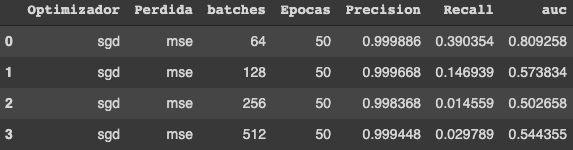

La siguiente tabla mostraba los efectos al tener distintas cantidades de épocas.

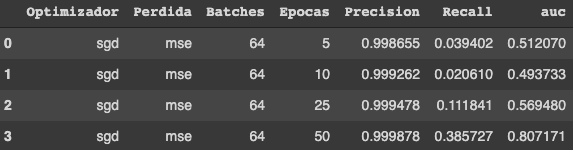

Después vimos los cambios con tres funciones distintas de pérdida.
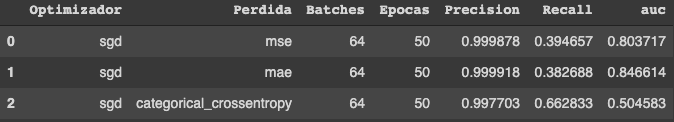

Finalmente, verificamos los cambiamos que ocasionaban los optimizadores utilizando los parámetros que identificamos fueron más eficientes en las otras pruebas.

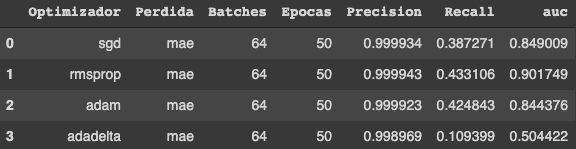

Ya con estos valores, pasamos a modificar el número de capas y filtros para ver sus efectos.

Iniciamos con 3 capas y 4 filtros con activación relu.

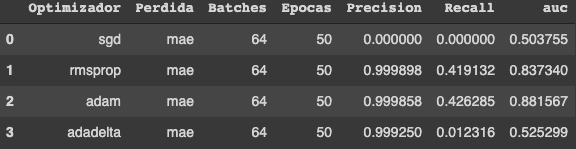

Después probamos con 4 capas y 6 filtros con activación softmax.

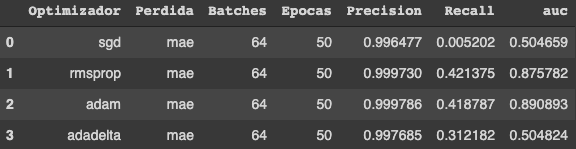

Finalmente, probamos con 2 capas y 7 filtros con activación exponencial.

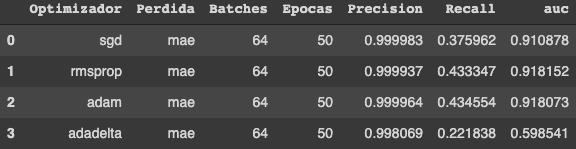

Con estos resultados, seleccionamos los 7 modelos a utilizar para nuestros mejores resultados. Algunos compartiendo hiperparámetros similares y otros con variaciones mayores.

In [ ]:
#Creación de la tabla
dataf = pd.DataFrame(lista, columns=["Optimizador", "Perdida", "Activación" ,"Batches", 
  "Epocas","No. Capas","No. Filtros", "Precision", "Recall", "auc"])
dataf 

,Optimizador,Perdida,Activación,Batches,Epocas,No. Capas,No. Filtros,Precision,Recall,auc
0,sgd,mse,relu,64,50,2,8,0.999831,0.400988,0.807019
1,sgd,mae,exponential,128,25,2,7,0.999866,0.357125,0.855621
2,sgd,categorical_crossentropy,softmax,512,5,4,6,0.997698,0.734728,0.506289
3,rmsprop,categorical_crossentropy,softmax,64,25,2,7,0.999015,0.046093,0.568435
4,rmsprop,mae,relu,64,50,2,8,0.999974,0.423661,0.904055
5,adam,mse,exponential,256,50,2,7,0.999947,0.434121,0.909750
6,adadelta,mae,softmax,128,25,4,6,0.997659,0.245117,0.496128


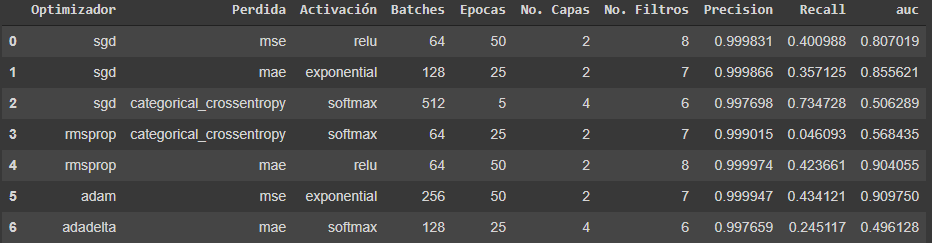

En la tabla anterior podemos ver nuestros mejores siete modelos. Basados en las pruebas que hicimos fue que seleccionamos los atributos que mejor se comportaron en conjunto y de esta manera desarrollamos los modelos.Los mejores modelos se seleccionaron por ser los que mayor desempeño presentaron en precisión, auc y recall.

Si bien no están ordenados por estos atributos,puede notarse que el quinto y sexto modelo son nuestros dos mejores modelos. 

La mayoría de estos modelos presentan una precisión mínima de .999 salvo 2, los cuales atribuímos al número de capas su desempeño. Estos tienen 4 capas convolucionales pues intentamos obtener los mejores modelos que presentaran este numero de capas, dado que la mayoría de nuestros modelos presentaban 2 capas convolucionales Atribuímos también su desempeño al número de epocas.

Si bien obtuvimos que a mayor número de épocas mejor es el desempeño del modelo, en algunos modelos optamos por poner un menor número de épocas para no ocupar todos los recursos de memoria con los que contamos, pero estos siete modelos muestran un buen desempeño sin importar del número de epocas.



Realizando este proyecto tuvimos varias experiencias que aprendimos para futuros trabajos.


1.   Es necesario tener una alta cantidad de espacio en la memoria RAM si se van a tener muchas épocas. Probando con 100 épocas, el espacio disponible en google colab no era suficiente para realizar todo el análisis.
2.   Cuando se creen modelos, no utilizar grandes números de combinaciones posibles. Esto debido a que el programa crashea cuando se intentan realizar modelos combinando cada uno de las posibles funciones de pérdida, activación, diversos tamaños de bloques y números de épocas. Es mejor tener definidas las pruebas a realizar para eficientar el proceso. 
3.   El número de batches no afecta significativamente los resultados, pero ayuda a facilitar el proceso al no utilizar tantos recursos del computador.



In [ ]:
# Mini proyecto: Inpainting and Denoising Autoencoder.

# Para el modelo anterior de Denoising Autoencoder (inpainting), explora el
# desempeño que puedas obtener probando distintos valores para los siguientes
# hiperparámetros.
# 1) Número de capas convolucionales, y número de filtros en cada capa.
# 2) Función de pérdida y activaciones de las capas.
# 3) Tamaño del lote (batch size) y número de épocas.

# En una tabla reporta el desempeño obtenido con tus 7 mejores modelos.
# Justifica por qué son tus mejores modelos.
# Incluye una lista de, al menos, 3 experiencias aprendidas con este ejercicio.

# Deadline: 18 de noviembre, 6:00 pm. PDF por correo electrónico.